In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df=pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X1', ylabel='X2'>

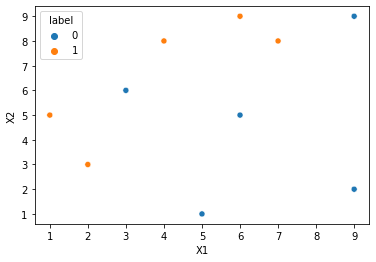

In [6]:
import seaborn as sns
sns.scatterplot(df['X1'],df['X2'],hue=df['label'])

In [7]:
df['weight']=1/df.shape[0]

In [8]:
df

,X1,X2,label,weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [9]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
x=df.iloc[:,:2].values
y=df.iloc[:,-2].values

In [19]:
dt1=DecisionTreeClassifier(max_depth=1)

In [20]:
y

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [21]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

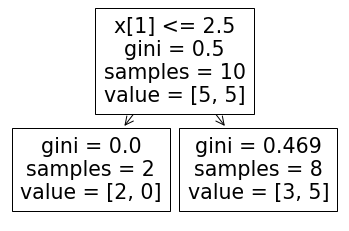

In [22]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<AxesSubplot:>

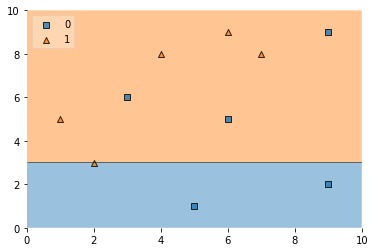

In [23]:
plot_decision_regions(x,y,clf=dt1,legend=2)

In [26]:
df['y_pred1']=dt1.predict(x)

In [27]:
df

,X1,X2,label,weight,y_pred1
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [28]:
def calculate_model_weigth(error):
    return 0.5*np.log((1-error)/(error))

In [42]:
error=0
for i,j,weight in zip(df['label'],df['y_pred1'],df['weight']):
    if i!=j:
        error+=weight
error=np.round(error,2)
        

In [43]:
calculate_model_weigth(error)

0.42364893019360184

In [53]:
def update_row_weights(row,alpha=np.round(calculate_model_weigth(error),2)):
    if row['label']==row['y_pred1']:
        return row['weight']*np.exp(-alpha)
    else:
        return row['weight']*np.exp(alpha)

In [54]:
df['updated_weight']=df.apply(update_row_weights,axis=1)

In [55]:
df

,X1,X2,label,weight,y_pred1,updated_weight
0,1,5,1,0.1,1,0.065705
1,2,3,1,0.1,1,0.065705
2,3,6,0,0.1,1,0.152196
3,4,8,1,0.1,1,0.065705
4,5,1,0,0.1,0,0.065705
5,6,9,1,0.1,1,0.065705
6,6,5,0,0.1,1,0.152196
7,7,8,1,0.1,1,0.065705
8,9,9,0,0.1,1,0.152196
9,9,2,0,0.1,0,0.065705


In [56]:
df['updated_weight'].sum()

0.91652124055613

In [57]:
df['normalized_weights']=df['updated_weight']/df['updated_weight'].sum()

In [58]:
df

,X1,X2,label,weight,y_pred1,updated_weight,normalized_weights
0,1,5,1,0.1,1,0.065705,0.071689
1,2,3,1,0.1,1,0.065705,0.071689
2,3,6,0,0.1,1,0.152196,0.166059
3,4,8,1,0.1,1,0.065705,0.071689
4,5,1,0,0.1,0,0.065705,0.071689
5,6,9,1,0.1,1,0.065705,0.071689
6,6,5,0,0.1,1,0.152196,0.166059
7,7,8,1,0.1,1,0.065705,0.071689
8,9,9,0,0.1,1,0.152196,0.166059
9,9,2,0,0.1,0,0.065705,0.071689


In [59]:
df['normalized_weights'].sum()

1.0

In [62]:
from sklearn.ensemble import StackingClassifier

In [ ]:
StackingClassifier()